In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [123]:
playstore = pd.read_csv('googleplaystore.csv')
user_reviews = pd.read_csv('googleplaystore_user_reviews.csv')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [30]:
playstore.describe()
# В датасете явно есть ошибки, т.к. рейтинг не может быть больше 5

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [85]:
# Проверим датасет на дубликаты
playstore['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
8 Ball Pool                                          7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Dp for girls                                         1
PumpUp — Fitness Community                           1
Cy-Fair FCU Mobile Banking                           1
ES Anywhere                                          1
EB Kit                                               1
Name: App, Length: 9660, dtype: int64

In [110]:
#Удалим дубликаты и приложения с рейтингом выше 5
visual_ps = playstore.loc[playstore['Rating'] <= 5].drop_duplicates(subset=['App'], keep='last')
visual_ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   object 
 4   Size            8196 non-null   object 
 5   Installs        8196 non-null   object 
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   object 
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8192 non-null   object 
 12  Android Ver     8194 non-null   object 
dtypes: float64(1), object(12)
memory usage: 896.4+ KB


In [111]:
visual_ps['Installs'].unique()
#посмотрим уникальные значения по столбцу с количеством установки

array(['10,000+', '5,000,000+', '50,000,000+', '100,000+', '50,000+',
       '1,000,000+', '10,000,000+', '5,000+', '500,000+',
       '1,000,000,000+', '100,000,000+', '1,000+', '100+', '500+', '10+',
       '5+', '50+', '1+', '500,000,000+'], dtype=object)

In [114]:
visual_ps['Installs_']=visual_ps['Installs'].apply(lambda x: int(x.replace('+' , '').replace(',' , '')))
# Добавим колонку с количеством установок в формате int с которой будет удобнее работать и строить визуализации

<AxesSubplot:title={'center':'Distribution of ratings'}, ylabel='Frequency'>

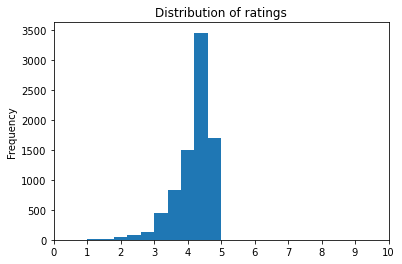

In [115]:
#Построим Гистограмму по распределению рейтинга
visual_ps['Rating'].plot(kind='hist',
                     title='Distribution of ratings',
                        xlabel='Rating',
                        xticks = range(11))
#В основном оценки ставили выше среднего

<AxesSubplot:title={'center':'Distribution of ratings'}>

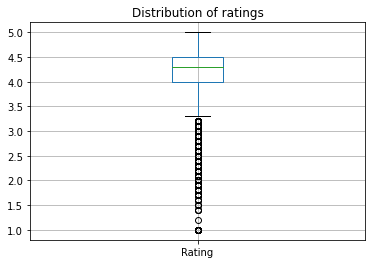

In [116]:
visual_ps['Rating'].plot(kind='box',
                         title='Distribution of ratings',
                         grid=True)
#Основное распределение рейтинга - выше среднего

<AxesSubplot:title={'center':'Distribution rating by category'}, xlabel='Category', ylabel='Mean rating'>

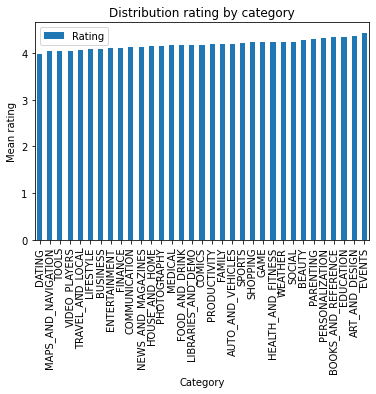

In [118]:
# Посмотрим какая категория приложений имеет самый высокий рейтинг
mean_rating = visual_ps[['Category', 'Rating']].groupby('Category').mean().sort_values(by = 'Rating')
mean_rating.plot(kind='bar',
                      title='Distribution rating by category',
                     xlabel='Category',
                     ylabel='Mean rating')
#Самый высокий рейтинг у приложений категории Events

<AxesSubplot:title={'center':'Distribution rating by category'}, xlabel='Category', ylabel='Mean rating'>

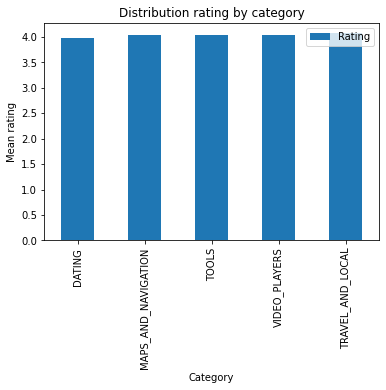

In [121]:
top_mean_rating = mean_rating.head(5)
top_mean_rating.plot(kind='bar',
                      title='Distribution rating by category',
                     xlabel='Category',
                     ylabel='Mean rating')

<AxesSubplot:title={'center':'Popular category'}, xlabel='Category', ylabel='Installs count'>

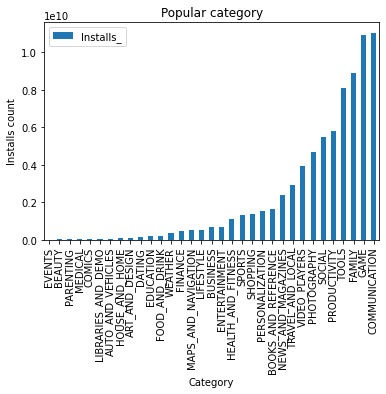

In [134]:
# Теперь посмотрим самую популярную категорию приложений, т.е. какую категорию приложений больше всего устанавливали
popular_category = visual_ps[['Category', 'Installs_']].groupby('Category').sum().sort_values(by = 'Installs_')
popular_category.plot(kind='bar',
                      title='Popular category',
                     xlabel='Category',
                     ylabel='Installs count')

<AxesSubplot:title={'center':'Popular category'}, ylabel='Category'>

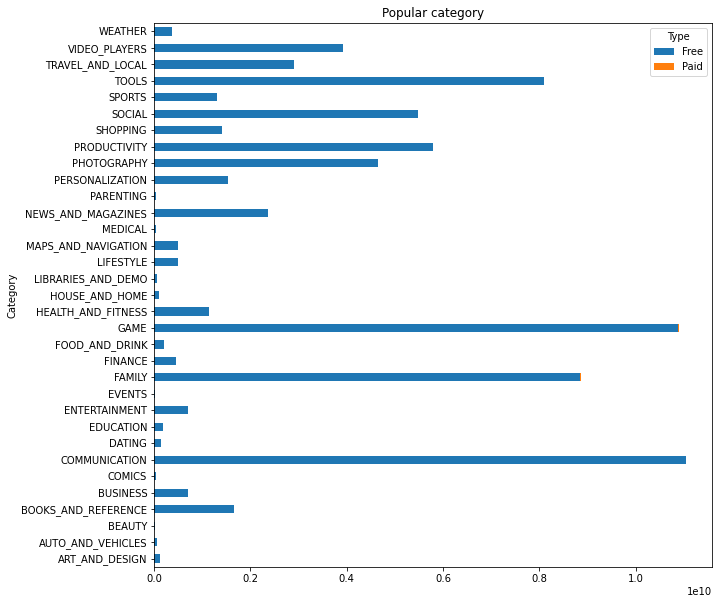

In [167]:
pop_cat = visual_ps[['Category', 'Type', 'Installs_']].groupby(['Category', 'Type']).sum().reset_index()
pop_cat.pivot_table(index='Category', columns = 'Type', values = 'Installs_', aggfunc = 'sum').plot(kind='barh',
                                                                                                    title='Popular category',
                                                                                                    xlabel='Category',
                                                                                                    ylabel='Installs count',
                                                                                                    stacked=True,
                                                                                                   figsize=(10,10))
#Тут я хотела посмотреть по количеству скачиваний как распределялось количество бесплатных и платных версий
# но платыне версии по сравнению с беслатными скачивают так редко, что получилась несуразица:)